# Import necessary libraries


In [21]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from string import punctuation
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load the data


In [14]:
df = pd.read_csv('/content/Corona_NLP_test.csv', encoding='latin1')


# Convert the text corpus into tokens


In [15]:
corpus_tokens = []
for text in df['OriginalTweet']:
    tokens = nltk.word_tokenize(text)
    corpus_tokens.extend(tokens)

print(corpus_tokens[:10])

['TRENDING', ':', 'New', 'Yorkers', 'encounter', 'empty', 'supermarket', 'shelves', '(', 'pictured']


# Perform stop word removal


In [22]:
stop_words = set(stopwords.words('english'))
filtered_tokens = [token.lower() for token in corpus_tokens if token.lower() not in stop_words and token.lower() not in punctuation]

print(filtered_tokens[:10])

['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'brooklyn']


# Count Word frequencies


In [23]:
word_freq = Counter(filtered_tokens)

print(word_freq.most_common(10))

[('https', 1824), ('covid_19', 1537), ('coronavirus', 1510), ('food', 1331), ('store', 1012), ('grocery', 816), ('people', 783), ('stock', 780), ('amp', 610), ('covid-19', 554)]


# Create word cloud


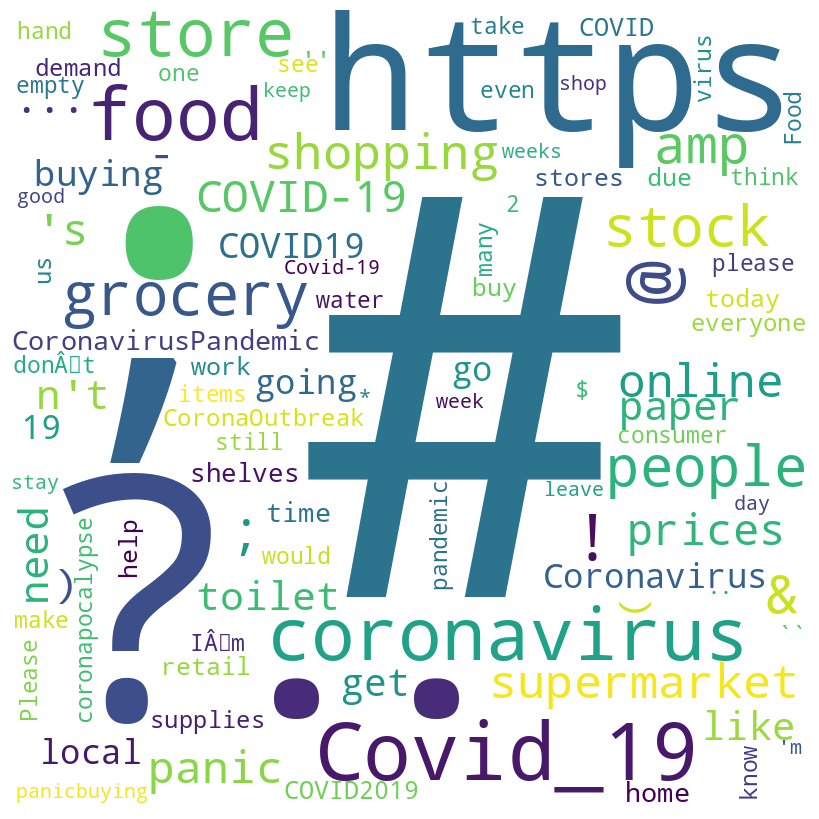

In [24]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate_from_frequencies(word_freqs)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()